In [ ]:
from graphmodels.graphmodel_exp import GraphModel, concatenate_graph_specs

In [ ]:
TEE_CO2eq_nodes = {'EF_EEi': {'type': 'input',
                              'unit': 'kg CH4 / head',
                              'name': 'Emission factor enteric (CH4)'},
                   'TAi': {'type': 'variable',
                           'unit': 'heads',
                           'name': 'Total animal population'},
                   'GWPCH4': {'type': 'parameter',
                              'unit': 'CH4/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'TEE_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'CH4 emissions enteric in CO2eq',
                                 'computation': lambda TAi, EF_EEi, GWPCH4, **kwargs: (TAi * EF_EEi).sum() * GWPCH4
                                 }
                  }


GraphModel(TEE_CO2eq_nodes).draw()

In [ ]:
FE_CO2eq_nodes = {'CL_total': {'type': 'input',
                               'name': 'Cropland (including perm. and fallow land)',
                               'unit': '1000 ha'},
                  'SFU': {'type': 'input', 'unit': 'kg/ha', 'name': 'Surfacic fertilizer use'},
                  'IN_F': {'type': 'variable',
                           'unit': 'kgN',
                           'name': 'Fertilizer input',
                           'computation': lambda CL_total, SFU, **kwargs: CL_total * FU
                           },
                  'EF_F': {'type': 'parameter',
                           'unit': 'kg N2O-N/kg N',
                           'name': 'Emission factor N2O from fertilizer'},
                  'F_N2O': {'type': 'variable',
                            'unit': 'gigagrams (N2O)',
                            'name': 'N2O emissions from fertilizer use',
                            'computation': lambda IN_F, EF_F, **kwargs: IN_F * EF_F
                            },
                  'GWPN2O': {'type': 'parameter',
                             'unit': 'N2O/CO2',
                             'name': 'GWP conversion CO2eq'},
                  'FE_CO2eq': {'type': 'output',
                               'unit': 'gigagrams (CO2eq)',
                               'name': 'Emissions fertilizer CO2eq',
                               'computation': lambda F_N2O, GWPN2O, **kwargs: F_N2O * GWPN2O}
                 }


GraphModel(FE_CO2eq_nodes).draw()

In [ ]:
TMP_CO2eq_nodes = {'TAi': {'type': 'input', 'unit': 'heads', 'name': 'Total animal population'},
                   'MYi': {'type': 'input', 'unit': 'kgN', 'name': 'Manure yields'},
                   'TMi': {'type': 'variable',
                           'unit': 'kgN',
                           'name': 'Vector total manure produced',
                           'computation': lambda TAi, MYi, **kwargs: TAi * MYi
                           },
                   'TM_LPi': {'type': 'input',
                              'unit': '%',
                              'name': '% total manure left on pasture'},
                   'EF_Li': {'type': 'parameter',
                             'unit': '',
                             'name': 'Vector Emission factors N2O left on pasture'
                             },
                   'GWPN2O': {'type': 'parameter',
                              'unit': 'N2O/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'TMP_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions  manure left on pasture CO2eq',
                                 'computation': lambda TMi, TM_LPi, EF_Li, GWPN2O, **kwargs: (TMi * TM_LPi * EF_Li).sum() * GWPN2O}}

GraphModel(TMP_CO2eq_nodes).draw()

In [ ]:
TMA_CO2eq_nodes = {'TMi': {'type': 'input',
                           'unit': 'kgN',
                           'name': 'Vector total manure produced'},
                   'MM_ASi': {'type': 'parameter',
                              'unit': '%',
                              'name': '% total manure applied to soil'},
                   'MASi': {'type': 'variable',
                            'unit': 'kgN',
                            'name': 'Vector manure applied to soil',
                            'computation': lambda TMi, MM_ASi, **kwargs: TMi * MM_ASi
                            },
                   'EF_ASi': {'type': 'parameter',
                              'unit': '',
                              'name': 'Vector Emission factors N2O applied to soil'},
                   'GWPN2O': {'type': 'parameter',
                              'unit': 'N2O/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'TMA_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions  manure applied to soil CO2eq',
                                 'computation': lambda EF_ASi, MASi, GWPN2O, **kwargs: (EF_ASi * MASi).sum() * GWPN2O
                                 }
                   }

GraphModel(TMA_CO2eq_nodes).draw()

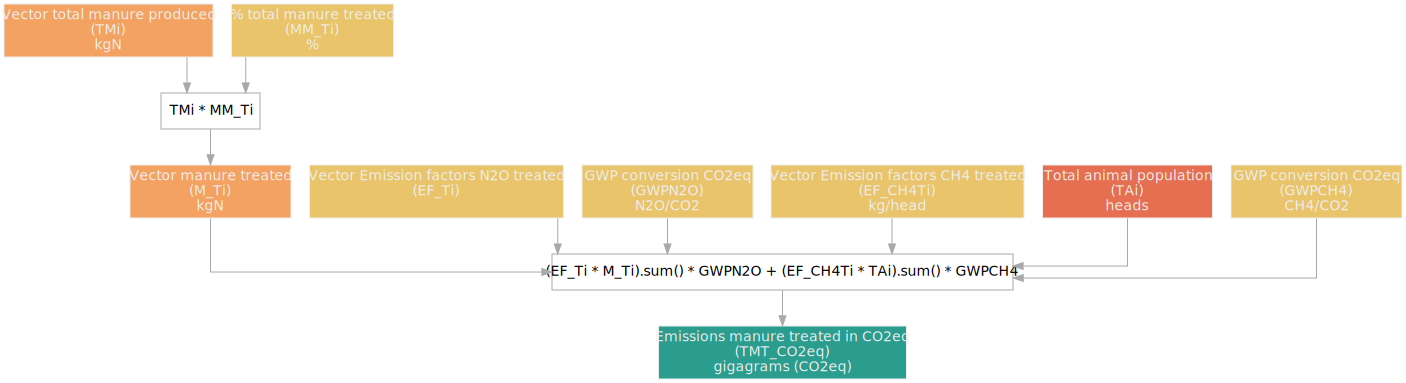

In [223]:
TMT_CO2eq_nodes = {'TMi': {'type': 'variable',
                           'unit': 'kgN',
                           'name': 'Vector total manure produced'},
                   'MM_Ti': {'type': 'parameter', 'unit': '%', 'name': '% total manure treated'},
                   'M_Ti': {'type': 'variable',
                            'unit': 'kgN',
                            'name': 'Vector manure treated',
                            'computation': lambda TMi, MM_Ti, **kwargs: TMi * MM_Ti
                            },
                   'EF_Ti': {'type': 'parameter',
                             'unit': '',
                             'name': 'Vector Emission factors N2O treated'},
                   'GWPN2O': {'type': 'parameter',
                              'unit': 'N2O/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'EF_CH4Ti': {'type': 'parameter',
                                'unit': 'kg/head',
                                'name': 'Vector Emission factors CH4 treated'},
                   'TAi': {'type': 'input',
                           'unit': 'heads',
                           'name': 'Total animal population'},
                   'GWPCH4': {'type': 'parameter',
                              'unit': 'CH4/CO2',
                              'name': 'GWP conversion CO2eq'},
                   'TMT_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions manure treated in CO2eq',
                                 'computation': lambda EF_Ti, M_Ti, GWPN2O, EF_CH4Ti, TAi, GWPCH4, **kwargs: (EF_Ti * M_Ti).sum() * GWPN2O + (EF_CH4Ti * TAi).sum() * GWPCH4}}


GraphModel(TMT_CO2eq_nodes).draw()

In [ ]:
GE3_nodes = {'P': {'type': 'input', 'unit': 'population', 'name': 'Total population'},
             'TEE_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'CH4 emissions enteric in CO2eq'},
             'TMT_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions manure treated in CO2eq'},
             'TMA_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions  manure applied to soil CO2eq'},
             'TMP_CO2eq': {'type': 'variable',
                           'unit': 'gigagrams (CO2eq)',
                           'name': 'Emissions  manure left on pasture CO2eq'},
             'FE_CO2eq': {'type': 'variable',
                          'unit': 'gigagrams (CO2eq)',
                          'name': 'Emissions fertilizer CO2eq'},
             'OEi': {'type': 'input',
                     'unit': 'gigagrams (CO2eq)',
                     'name': 'Vector of other emissions'},
             'GE3': {'type': 'output',
                     'unit': '1',
                     'name': 'Ratio of non-CO2 emissions in agriculture to population',
                     'computation': lambda OEi, TEE_CO2eq, TMT_CO2eq, TMP_CO2eq, TMA_CO2eq, FE_CO2eq, P, **kwargs: (OEi + TEE_CO2eq + TMT_CO2eq + TMP_CO2eq + TMA_CO2eq + FE_CO2eq) / P * 1e3}}


GraphModel(GE3_nodes).draw()

In [8]:
all_nodes = [TEE_CO2eq_nodes, FE_CO2eq_nodes, TMP_CO2eq_nodes, TMA_CO2eq_nodes, TMT_CO2eq_nodes, GE3_nodes]
model_GE3 = GraphModel(concatenate_graph_specs(all_nodes))

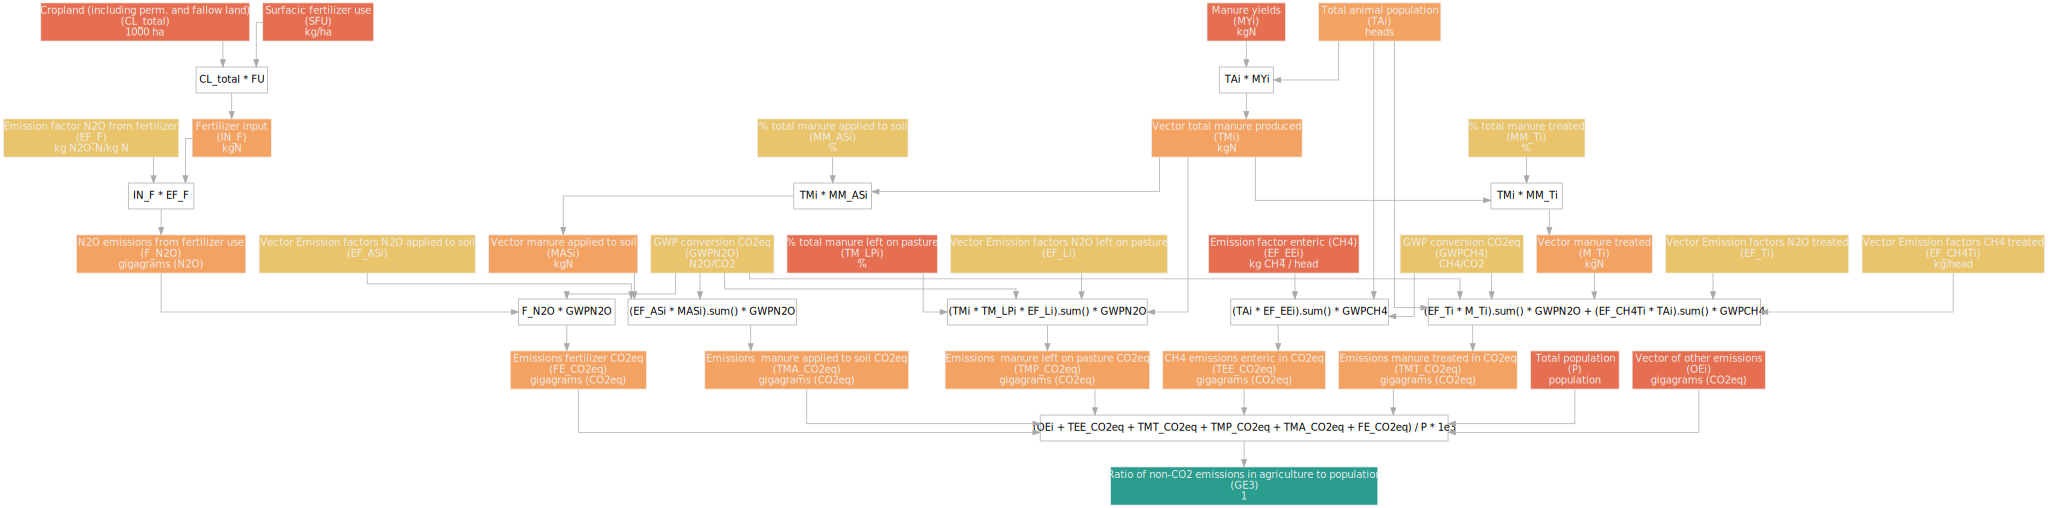

In [9]:
model_GE3.draw()

In [10]:
model_GE3.summary_df

,name,type,unit,computation
id,,,,
EF_EEi,Emission factor enteric (CH4),input,kg CH4 / head,NaN
TAi,Total animal population,variable,heads,NaN
GWPCH4,GWP conversion CO2eq,parameter,CH4/CO2,NaN
TEE_CO2eq,CH4 emissions enteric in CO2eq,variable,gigagrams (CO2eq),(TAi * EF_EEi).sum() * GWPCH4
CL_total,Cropland (including perm. and fallow land),input,1000 ha,NaN
SFU,Surfacic fertilizer use,input,kg/ha,NaN
IN_F,Fertilizer input,variable,kgN,CL_total * FU
EF_F,Emission factor N2O from fertilizer,parameter,kg N2O-N/kg N,NaN
F_N2O,N2O emissions from fertilizer use,variable,gigagrams (N2O),IN_F * EF_F


# Animal

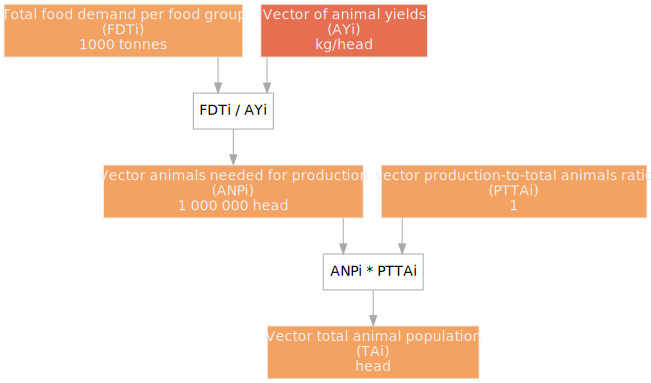

In [11]:
TAi_nodes = {'FDTi': {'type': 'variable',
                      'unit': '1000 tonnes',
                      'name': 'Total food demand per food group'},
             'AYi': {'type': 'input',
                     'unit': 'kg/head',
                     'name': 'Vector of animal yields'},
             'ANPi': {'type': 'variable',
                      'unit': '1 000 000 head',
                      'name': 'Vector animals needed for production',
                      'computation': lambda FDTi, AYi, **kwargs: FDTi / AYi
                      },
             'PTTAi': {'type': 'variable',
                       'unit': '1',
                       'name': 'vector production-to-total animals ratio',
                       },
             'TAi': {'type': 'variable',
                      'unit': 'head',
                      'name': 'Vector total animal population',
                      'computation': lambda ANPi, PTTAi, **kwargs: ANPi * PTTAi
                      },
             }

TAi_model = GraphModel(TAi_nodes)

TAi_model.draw()


# add data

In [12]:
model_GE3.summary_df

,name,type,unit,computation
id,,,,
EF_EEi,Emission factor enteric (CH4),input,kg CH4 / head,NaN
TAi,Total animal population,variable,heads,NaN
GWPCH4,GWP conversion CO2eq,parameter,CH4/CO2,NaN
TEE_CO2eq,CH4 emissions enteric in CO2eq,variable,gigagrams (CO2eq),(TAi * EF_EEi).sum() * GWPCH4
CL_total,Cropland (including perm. and fallow land),input,1000 ha,NaN
SFU,Surfacic fertilizer use,input,kg/ha,NaN
IN_F,Fertilizer input,variable,kgN,CL_total * FU
EF_F,Emission factor N2O from fertilizer,parameter,kg N2O-N/kg N,NaN
F_N2O,N2O emissions from fertilizer use,variable,gigagrams (N2O),IN_F * EF_F


# TMP

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

GP = pd.read_csv('models/Hermen/data/GP.csv')

to_drop = ['Mules and Asses', 'Sheep and Goats', 'Cattle', 'Swine', 'Poultry Birds',
           'All Animals',
          'Camels and Llamas',
           'Chickens']
GP = GP[~GP.Item.isin(to_drop)]
GP[['GGI_code', 'Element', 'Unit']].drop_duplicates()

,GGI_code,Element,Unit
0,NaN,Stocks,Head
60,NaN,Indirect emissions (N2O that leaches) (Manure ...,gigagrams
120,NaN,Indirect emissions (N2O that volatilises) (Man...,gigagrams
180,M_LPi,Manure left on pasture (N content),kg
240,NaN,Manure left on pasture that leaches (N content),kg
300,NaN,Manure left on pasture that volatilises (N con...,kg
360,EF_Li,Implied emission factor for N2O (Manure on pas...,kg N2O-N/kg N
420,NaN,Direct emissions (N2O) (Manure on pasture),gigagrams
480,NaN,Direct emissions (CO2eq) (Manure on pasture),gigagrams
540,NaN,Indirect emissions (N2O) (Manure on pasture),gigagrams


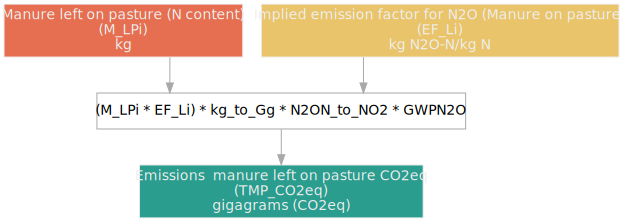

In [260]:
TMP_CO2eq_nodes = {'M_LPi': {'type': 'input',
                              'unit': 'kg',
                              'name': 'Manure left on pasture (N content)'},
                   'EF_Li': {'type': 'parameter',
                             'unit': 'kg N2O-N/kg N',
                             'name': 'Implied emission factor for N2O (Manure on pasture)'
                             },
                   'TMP_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions  manure left on pasture CO2eq',
                                 'computation': lambda M_LPi, EF_Li, **kwargs: (M_LPi * EF_Li) * kg_to_Gg * N2ON_to_NO2 * GWPN2O}}

Model = GraphModel(TMP_CO2eq_nodes)
Model.draw()

In [256]:
def df_to_dict(df):
    X = {}
    for code in df.columns:
        X[code] = df[code].fillna(0)
    return X
def pivot(df):
    return df.pivot(index=['Area', 'Year','Item'], columns='GGI_code', values='Value')


pivoted = pivot(GP.dropna())
X = df_to_dict(pivoted[['M_LPi', 'EF_Li']])
GWPN2O = 310
GWPCH4 = 21
N2ON_to_NO2 = 1.57
kg_to_Gg = 1e-6

predictions = Model.run(X)
baseline = pivot(GP.dropna())

In [258]:
plot_variable('TMP_CO2eq', 'France')

# TMT

In [230]:
GM = pd.read_csv('models/Hermen/data/GM.csv')

to_drop = ['Mules and Asses', 'Sheep and Goats', 'Cattle', 'Swine', 'Poultry Birds',
           'All Animals',
          'Camels and Llamas',
           'Chickens']
GM = GM[~GM.Item.isin(to_drop)]

In [233]:
def df_to_dict(df):
    X = {}
    for code in df.columns:
        X[code] = df[code].fillna(0)
    return X
def pivot(df):
    return df.pivot(index=['Area', 'Year','Item'], columns='GGI_code', values='Value')


pivoted = pivot(GM.dropna())
X = df_to_dict(pivoted[['EF_CH4Ti', 'TAi', 'M_Ti', 'EF_Ti']])
GWPN2O = 310
GWPCH4 = 21
N2ON_to_NO2 = 1.57
kg_to_Gg = 1e-6

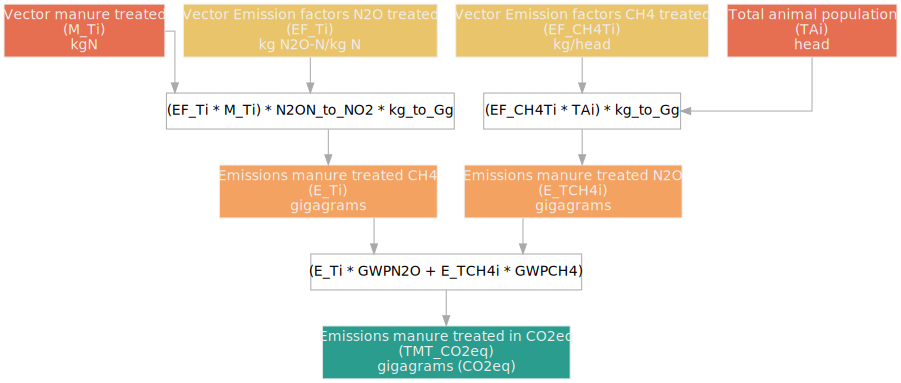

In [234]:
TMT_CO2eq_nodes = {'M_Ti': {'type': 'input',
                            'unit': 'kgN',
                            'name': 'Vector manure treated',
                            },
                   'EF_Ti': {'type': 'parameter',
                             'unit': 'kg N2O-N/kg N',
                             'name': 'Vector Emission factors N2O treated'},
#                    'GWPN2O': {'type': 'parameter',
#                               'unit': '1',
#                               'name': 'GWP conversion CO2eq'},
                   'EF_CH4Ti': {'type': 'parameter',
                                'unit': 'kg/head',
                                'name': 'Vector Emission factors CH4 treated'},
                   'TAi': {'type': 'input',
                           'unit': 'head',
                           'name': 'Total animal population'},
#                    'GWPCH4': {'type': 'parameter',
#                               'unit': '1',
#                               'name': 'GWP conversion CO2eq'},
                   'E_Ti': {'type': 'variable',
                                 'unit': 'gigagrams',
                                 'name': 'Emissions manure treated CH4',
                                 'computation': lambda EF_Ti, M_Ti, **kwargs: (EF_Ti * M_Ti) * N2ON_to_NO2 * kg_to_Gg
                                },
                   'E_TCH4i': {'type': 'variable',
                                 'unit': 'gigagrams',
                                 'name': 'Emissions manure treated N2O',
                                 'computation': lambda EF_CH4Ti, TAi, **kwargs: (EF_CH4Ti * TAi) * kg_to_Gg
                                },
                   'TMT_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions manure treated in CO2eq',
                                 'computation': lambda E_Ti, E_TCH4i, **kwargs: (E_Ti * GWPN2O + E_TCH4i * GWPCH4)
                                }}


Model = GraphModel(TMT_CO2eq_nodes)

Model.draw()

In [211]:
predictions = Model.run(X)
baseline = pivot(GM.dropna())

In [212]:
def plot_variable(var, country='all'):
    
    y_pred = predictions[var].groupby(level=['Area', 'Year']).sum()
    
    if country == "all":
        y_true = baseline[var].groupby(level=['Area', 'Year']).sum()
    else:
        y_true = baseline[var].groupby(level=['Area', 'Year']).sum().loc[country, :]

    df = pd.concat([y_pred, y_true],axis=1).dropna().rename(columns={0:f'{var}_computed', var: f'{var}_FAO'})
    fig = px.scatter(df.reset_index(), x=f'{var}_computed', y=f'{var}_FAO', hover_data=['Area', 'Year'])
    return fig

In [213]:
# 10 9.2

In [214]:
plot_variable('TMT_CO2eq', 'Hungary')

In [215]:
plot_variable('E_TCH4i', 'France')

In [216]:
plot_variable('TMT_CO2eq', 'Hungary')

# TMA

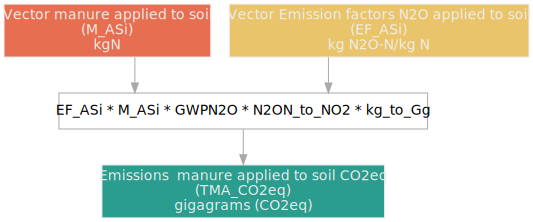

In [217]:
TMA_CO2eq_nodes = {'M_ASi': {'type': 'input',
                            'unit': 'kgN',
                            'name': 'Vector manure applied to soil',
                            },
                   'EF_ASi': {'type': 'parameter',
                              'unit': 'kg N2O-N/kg N',
                              'name': 'Vector Emission factors N2O applied to soil'},
#                    'GWPN2O': {'type': 'parameter',
#                               'unit': 'N2O/CO2',
#                               'name': 'GWP conversion CO2eq'},
                   'TMA_CO2eq': {'type': 'output',
                                 'unit': 'gigagrams (CO2eq)',
                                 'name': 'Emissions  manure applied to soil CO2eq',
                                 'computation': lambda EF_ASi, M_ASi, **kwargs:  EF_ASi * M_ASi * GWPN2O * N2ON_to_NO2 * kg_to_Gg
                                 }
                   }

Model = GraphModel(TMA_CO2eq_nodes)#
Model.draw()

In [218]:
GU = pd.read_csv('models/Hermen/data/GU.csv')

GU = GU[~GU.Item.isin(to_drop)]

In [219]:
def df_to_dict(df):
    X = {}
    for code in df.columns:
        X[code] = df[code].fillna(0)
    return X
def pivot(df):
    return df.pivot(index=['Area', 'Year','Item'], columns='GGI_code', values='Value')


pivoted = pivot(GU.dropna())
X = df_to_dict(pivoted[['M_ASi', 'EF_ASi']])


In [220]:
GU[['Element', 'GGI_code', 'Unit']].drop_duplicates()

,Element,GGI_code,Unit
0,Stocks,TAHi,Head
60,Manure applied to soils (N content),M_ASi,kg
120,Manure applied to soils that leaches (N content),NaN,kg
180,Manure applied to soils that volatilises (N co...,NaN,kg
240,Implied emission factor for N2O (Manure applied),EF_ASi,kg N2O-N/kg N
300,Direct emissions (N2O) (Manure applied),NaN,gigagrams
360,Direct emissions (CO2eq) (Manure applied),NaN,gigagrams
420,Indirect emissions (N2O that leaches) (Manure ...,NaN,gigagrams
480,Indirect emissions (N2O that volatilises) (Man...,NaN,gigagrams
540,Indirect emissions (N2O) (Manure applied),NaN,gigagrams


In [221]:
predictions = Model.run(X)
baseline = pivoted

In [201]:
plot_variable('TMA_CO2eq', 'all')